# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import plotgenerator as pg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [42]:
from inauguralproject import ExchangeEconomyClass

optimale allokeringer 

In [43]:
edgeworth = ExchangeEconomyClass()

def edgeworth_box(N):
    # Initialize lists to store x1A, x2A, x1B, and x2B
    x1A = [i / N for i in range(N + 1)]
    x2A = [i / N for i in range(N + 1)]
    x1B = [1 - x for x in x1A]
    x2B = [1 - x for x in x2A]

    # Calculate utility for initial endowments
    uA_initial = edgeworth.utility_A(edgeworth.par.w1A, edgeworth.par.w2A)
    print('uA_initial', uA_initial)
    uB_initial = edgeworth.utility_B((1-edgeworth.par.w1A), (1-edgeworth.par.w2A))
    print('uB_initial', uB_initial)

    # Lists to store x1A_val and x2A_val when condition is satisfied
    x1A_opt = []
    x2A_opt = []

    # Iterate over all combinations of x1A and x2A
    for x1A_val in x1A:
        for x2A_val in x2A:
            # Calculate utility for current allocation
            uA_current = edgeworth.utility_A(x1A_val, x2A_val)
            uB_current = edgeworth.utility_B(1-x1A_val, 1-x2A_val)
            
            # Check if current utility is greater than or equal to initial utility
            if uA_current >= uA_initial and uB_current >= uB_initial:
                x1A_opt.append(x1A_val)
                x2A_opt.append(x2A_val)

    # Return the lists of efficient allocations
    return x1A_opt, x2A_opt

# Call the function with N value
x1A_opt, x2A_opt = edgeworth_box(N=75)
#print("x1A_opt:", x1A_opt)
#print("x2A_opt:", x2A_opt)

uA_initial 0.41601676461038084
uB_initial 0.30365889718756617


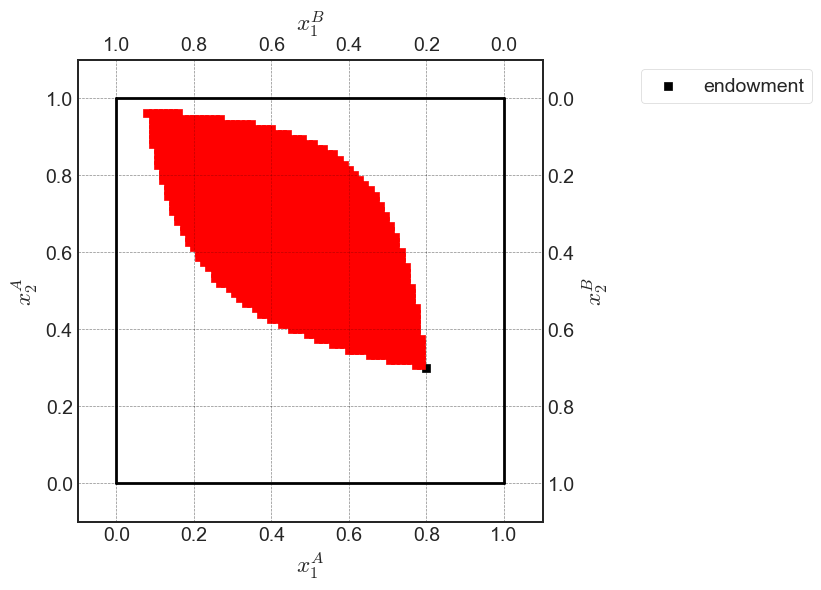

In [44]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

ax_A.scatter(x1A_opt,x2A_opt,marker='s',color='red',label='endowment')

# Question 2

eps givet forskellige priser



In [45]:
clearing_market_error = ExchangeEconomyClass()

def error_clearing(N):
    # Initialize lists to store p1, eps1, and eps2
    p1_values = [0.5 + 2*(i / N) for i in range(N)]
    eps1_values = []
    eps2_values = []

    # Iterate over all combinations of p1
    for p1_val in p1_values:
        eps1, eps2 = clearing_market_error.check_market_clearing(p1_val)
        eps1_values.append(eps1)
        eps2_values.append(eps2)

    return p1_values, eps1_values, eps2_values

# Call the function with N value and capture the returned values
p1_values, eps1_values, eps2_values = error_clearing(N=75)

# Print the results
#for p1_val, eps1_val, eps2_val in zip(p1_values, eps1_values, eps2_values):
#    print(f"p1: {p1_val:5.3f}, eps1: {eps1_val:5.3f}, eps2: {eps2_val:5.3f}")

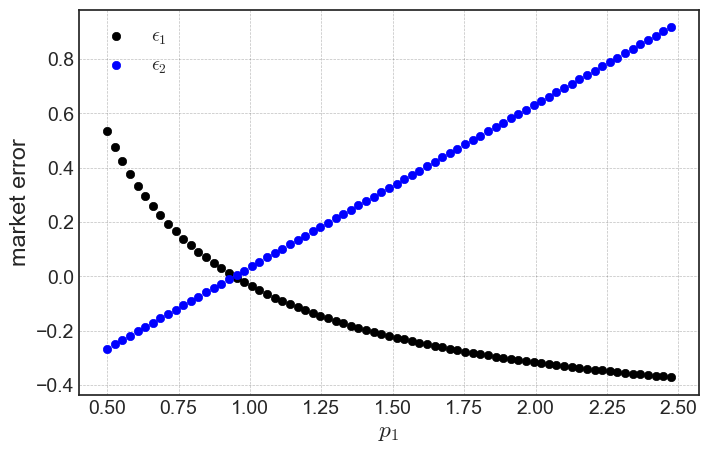

In [46]:
fig = pg.PlotFigure(figsize=(8,5),fontname=None)
fig.add_plot(x=p1_values,y=eps1_values,marker='o',color='black',label='$\epsilon_1$',xlabel=f"$p_1$",ylabel=f"market error")
fig.add_plot(x=p1_values,y=eps2_values,marker='o',color='blue',label='$\epsilon_2$',xlabel=f"$p_1$",ylabel=f"market error")
fig.add_legend()
fig.set_number_format('y','{x:,.1f}')
fig.show()

# Question 3

Explain your code and procedure

In [47]:
clear_market = ExchangeEconomyClass()

In [48]:
# code

clear_market = ExchangeEconomyClass()

p1_guess = 0.1    # 0.94444
clear_market.find_equilibrium(p1_guess)


  0: p1=  0.10000000 -> exess demand ->     5.06666667
  1: p1=  2.63333333 -> exess demand ->    -0.38481013
  2: p1=  2.44092827 -> exess demand ->    -0.36784788
  3: p1=  2.25700433 -> exess demand ->    -0.34892974
  4: p1=  2.08253946 -> exess demand ->    -0.32789631
     ...
 25: p1=  0.94634325 -> exess demand ->    -0.00120388
 50: p1=  0.94444458 -> exess demand ->    -0.00000009
 56: p1=  0.94444446 -> exess demand ->    -0.00000001


In [49]:
clear_market.print_solution()


solution to market equilibrium:
p1 = 0.944
p2 = 1
excess demand are:
z1 = -8.650000049570394e-09
z2= 8.169444454253494e-09


ADD CONCISE CONLUSION.

# Question 4

**a** 

In [50]:
clear_market.find_best_choice_test(N=75)
x1_best,x2_best,u_best,p1 = clear_market.find_best_choice_test(N=75)

print('The optimal price of A:', clear_market.find_best_choice_test(N=75)[3])
print('The allocation becomes: x1a=', x1_best,'x2a =', x2_best, 'and A´s utility becomes:', u_best)

The optimal price of A: 1.8866666666666667
The allocation becomes: x1a= 0.619316843345112 x2a = 0.6408888888888888 and A´s utility becomes: 0.633615985237553


**b**

In [51]:
x1A, x2A, uA, optimal_p1 = clear_market.find_best_choice_any_price()

print(f"Optimal price p1: {optimal_p1}")
print(f"Optimal allocations for A: x1A = {x1A}, x2A = {x2A}")
print(f"Utility of A: {uA}")

Optimal price p1: 1.8993460108783902
Optimal allocations for A: x1A = 0.6209680609392946, x2A = 0.6400435992747739
Utility of A: 0.6336208506936586


# Question 5

**a** 

In [52]:
clear_market.opgave_5_A()

u_A_opt, x1A_opt, x2A_opt = clear_market.opgave_5_A()
print("u_A_opt:", u_A_opt)
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt) 

u_A_opt: 0.7415523509091093
the optimal x1A for A is: 0.56
the optimal x2A for A is: 0.8533333333333334


**b**

In [53]:
clear_market.opgave_5_B()

u_A_opt, x1A_opt, x2A_opt = clear_market.opgave_5_B()
print("u_A_opt:", u_A_opt)
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt) 
# take 1min to print

u_A_opt: 0.7432205042058634
the optimal x1A for A is: 0.5769153830766153
the optimal x2A for A is: 0.8435687137427486


In [54]:
u_A_opt, x1A_opt, x2A_opt = clear_market.opgave_5_B_solver_2()

print("u_A_opt:", u_A_opt)
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt)

u_A_opt: 0.5757450607577385
the optimal x1A for A is: 0.8444377517604986
the optimal x2A for A is: 0.74322760892829


# Question 6

**a** 

In [55]:
clear_market.opgave_6_A()

x1A_opt, x2A_opt = clear_market.opgave_6_A()
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt) 

the optimal x1A for A is: 0.33326665333066613
the optimal x2A for A is: 0.6665333066613323


**B** 

# Question 7

**a** 

In [56]:
import random

# Define the number of draws
num_draws = 50

# Initialize lists to store the values of w1A and w2A
w1A_values = []
w2A_values = []

# Draw values for w1A and w2A and store them in the lists
for _ in range(num_draws):
    w1A_values.append(random.uniform(0, 1))
    w2A_values.append(random.uniform(0, 1))

print(w1A_values)
print(w2A_values)
# Define the list of vectors W
W_values = [(w1A_values[i], w2A_values[i]) for i in range(num_draws)]

# Print the list of vectors W
print("W values:")
for i, W in enumerate(W_values):
    print(f"W[{i+1}] =", W)

[0.525311836536933, 0.49268387103236566, 0.388165502337505, 0.9146622828284144, 0.45377283585627015, 0.7805572425998536, 0.05713017155838074, 0.47867725827924257, 0.9009417031767142, 0.9004483127244908, 0.8567918995193899, 0.6685879570098434, 0.092555857573147, 0.8850675733667684, 0.0036553497945628344, 0.7221165868350627, 0.9070322166075322, 0.7525732132596681, 0.5351337084981053, 0.39235141697958553, 0.5768788273992526, 0.18364081088411488, 0.6100760802321293, 0.4967602433676709, 0.7580594929032961, 0.5099342075973936, 0.8665503275128901, 0.7142980723401713, 0.8106966329154791, 0.1327266749461533, 0.7295228883331346, 0.4221276987204825, 0.6404148514005237, 0.2524337398527098, 0.25574869853217497, 0.7976046512511767, 0.5402891511610413, 0.7961497931171724, 0.9320008801857824, 0.7642147215029392, 0.5742516638888052, 0.40535883969287023, 0.20223361600164924, 0.9579049358840908, 0.9103322040700426, 0.1290341626970153, 0.8088942377526268, 0.5386092538891704, 0.6250532613948194, 0.86407675

# Question 8

**a** 

In [57]:
import inauguralproject_opg_7

In [58]:
from inauguralproject_opg_7 import ExchangeEconomyClass_opg_7

In [59]:
opgave_7 = ExchangeEconomyClass_opg_7()

p1_guess = 0.01    # 0.94444
opgave_7.find_equilibrium_test_1(p1_guess)

  0: p1=  0.01000000 -> excess demand ->    43.53453282    41.52914439    52.29606145    50.83579815    34.31170183    52.27331426    55.07491727    60.02927247    64.97092205    50.65195935    64.03575820    55.90580576    39.90821403    56.55772037    64.38995484    36.71122220    66.00062572    49.67296823    34.66578621    56.05396163    33.40039074    63.97381488    58.42885136    45.43282480    47.36312710    47.02183631    64.94436926    65.16434469    53.36893388    43.45147472    38.70160138    42.94840013    61.64247530    61.25568804    42.18035506    37.43978819    63.34106999    61.90306073    50.59426971    50.47104915    47.64289492    61.23255174    63.51124219    53.88543313    63.86434735    62.79714656    49.80173185    41.51191148    33.13627075    44.02451104 


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
opgave_7.print_solution()